## Diabetes dataset 
### Predict if a person is at risk of developing diabetes
### Binary Classification problem - XGBoost

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
column_list_file = 'diabetes_train_column_list.txt'
train_file = 'diabetes_train.csv'
validation_file = 'diabetes_validation.csv'

In [3]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [4]:
columns

['diabetes_class',
 'preg_count',
 'glucose_concentration',
 'diastolic_bp',
 'triceps_skin_fold_thickness',
 'two_hr_serum_insulin',
 'bmi',
 'diabetes_pedi',
 'age']

In [5]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [6]:
df_train

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,0,6,92.0,62.0,32.000,126.000000,32.0,0.085,46
1,0,5,132.0,80.0,19.664,68.792000,26.8,0.186,69
2,0,3,106.0,72.0,19.664,68.792000,25.8,0.207,27
3,0,4,99.0,68.0,38.000,68.792000,32.8,0.145,33
4,0,4,96.0,56.0,17.000,49.000000,20.8,0.340,26
...,...,...,...,...,...,...,...,...,...
532,1,9,164.0,84.0,21.000,100.335821,30.8,0.831,32
533,0,0,93.0,60.0,25.000,92.000000,28.7,0.532,22
534,1,10,125.0,70.0,26.000,115.000000,31.1,0.205,41
535,0,0,67.0,76.0,19.664,68.792000,45.3,0.194,46


In [34]:
def impute_data(df):
    group_class = df.groupby('diabetes_class')
    df['glucose_concentration'] = group_class['glucose_concentration'].transform(lambda x: x.replace(0, x.mean()))
    df['diastolic_bp'] = group_class['diastolic_bp'].transform(lambda x: x.replace(0, x.mean()))
    df['triceps_skin_fold_thickness'] = group_class['triceps_skin_fold_thickness'].transform(
        lambda x: x.replace(0, x.mean()))
    df['two_hr_serum_insulin'] = group_class['two_hr_serum_insulin'].transform(lambda x: x.replace(0, x.mean()))
    df['bmi'] = group_class['bmi'].transform(lambda x: x.replace(0, x.mean()))
    df['diabetes_pedi'] = group_class['diabetes_pedi'].transform(lambda x: x.replace(0, x.mean()))
    df['age'] = group_class['age'].transform(lambda x: x.replace(0, x.mean()))

    return df

df_train = impute_data(df_train)
df_validation = impute_data(df_validation)

In [35]:
df_validation.head()

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,0,1,130.0,70.0,13.000000,105.000000,25.9,0.472,22
1,1,8,133.0,72.0,22.164179,100.335821,32.9,0.270,39
2,0,0,137.0,68.0,14.000000,148.000000,24.8,0.143,21
3,0,2,88.0,74.0,19.000000,53.000000,29.0,0.229,22
4,1,9,130.0,70.0,22.164179,100.335821,34.2,0.652,45


In [36]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [37]:
# Launch a classifier
# XGBoost Training Parameter Reference: 
#   https://xgboost.readthedocs.io/en/latest/parameter.html
classifier = xgb.XGBClassifier (objective="binary:logistic")

In [38]:
classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [39]:
classifier.fit(X_train,
               y_train, 
               eval_set = [(X_train, y_train), (X_validation, y_validation)], 
               eval_metric=['logloss'],
               early_stopping_rounds=10)

[0]	validation_0-logloss:0.49731	validation_1-logloss:0.53781
[1]	validation_0-logloss:0.38423	validation_1-logloss:0.44006
[2]	validation_0-logloss:0.31024	validation_1-logloss:0.38514
[3]	validation_0-logloss:0.25753	validation_1-logloss:0.35046
[4]	validation_0-logloss:0.21756	validation_1-logloss:0.32501
[5]	validation_0-logloss:0.18826	validation_1-logloss:0.31735
[6]	validation_0-logloss:0.16458	validation_1-logloss:0.30751
[7]	validation_0-logloss:0.14683	validation_1-logloss:0.30289
[8]	validation_0-logloss:0.13129	validation_1-logloss:0.30398
[9]	validation_0-logloss:0.11722	validation_1-logloss:0.30241
[10]	validation_0-logloss:0.10817	validation_1-logloss:0.30345
[11]	validation_0-logloss:0.09883	validation_1-logloss:0.30365
[12]	validation_0-logloss:0.09145	validation_1-logloss:0.30030
[13]	validation_0-logloss:0.08561	validation_1-logloss:0.29829
[14]	validation_0-logloss:0.08104	validation_1-logloss:0.30239
[15]	validation_0-logloss:0.07660	validation_1-logloss:0.30182
[1

/Users/neetesh/opt/anaconda3/envs/python3_10/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/neetesh/opt/anaconda3/envs/python3_10/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [40]:
eval_result = classifier.evals_result()

In [41]:
training_rounds = range(len(eval_result['validation_0']['logloss']))

In [42]:
print(training_rounds)

range(0, 24)


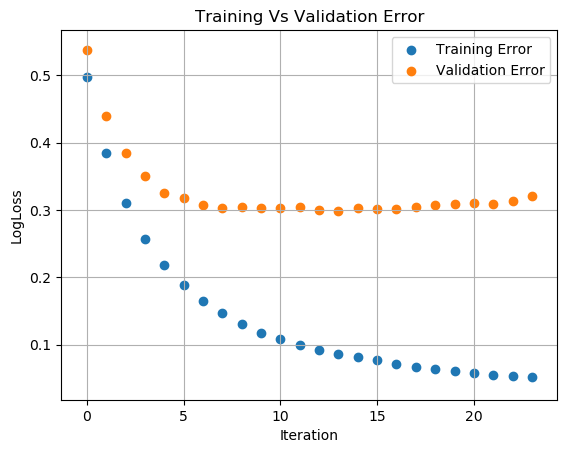

In [43]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['logloss'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['logloss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('LogLoss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

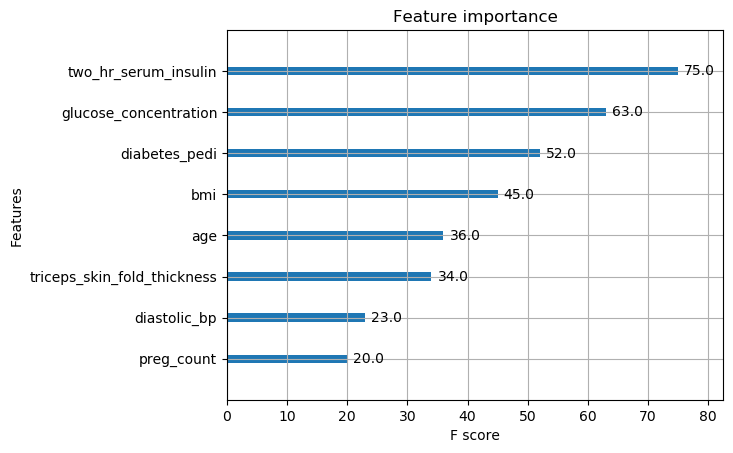

In [44]:
xgb.plot_importance(classifier)
plt.show()

In [45]:
df = pd.read_csv(validation_file,names=columns)

In [46]:
df.head()

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,0,1,130.0,70.0,13.000000,105.000000,25.9,0.472,22
1,1,8,133.0,72.0,22.164179,100.335821,32.9,0.270,39
2,0,0,137.0,68.0,14.000000,148.000000,24.8,0.143,21
3,0,2,88.0,74.0,19.000000,53.000000,29.0,0.229,22
4,1,9,130.0,70.0,22.164179,100.335821,34.2,0.652,45


In [47]:
X_test = df.iloc[:,1:]

In [48]:
result = classifier.predict(X_test)

In [49]:
result[:5]

array([0, 1, 0, 0, 1])

In [50]:
df['predicted_class'] = result

In [51]:
df.head()

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,predicted_class
0,0,1,130.0,70.0,13.000000,105.000000,25.9,0.472,22,0
1,1,8,133.0,72.0,22.164179,100.335821,32.9,0.270,39,1
2,0,0,137.0,68.0,14.000000,148.000000,24.8,0.143,21,0
3,0,2,88.0,74.0,19.000000,53.000000,29.0,0.229,22,0
4,1,9,130.0,70.0,22.164179,100.335821,34.2,0.652,45,1


## Binary Classifier Metrics

In [52]:
# Reference: https://scikit-learn.org/stable/modules/model_evaluation.html
# Explicitly stating labels. Pass=1, Fail=0
def true_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 0]

def true_negative(y_true, y_pred): 
    return confusion_matrix(y_true,y_pred,labels=[1,0])[1, 1]

def false_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[1, 0]

def false_negative(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 1]

In [53]:
# Compute Binary Classifier Metrics
# Returns a dictionary {"MetricName":Value,...}

def binary_classifier_metrics(y_true, y_pred):
    metrics = {}

    # References: 
    #  https://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html
    #  https://en.wikipedia.org/wiki/Confusion_matrix
    
    # Definition:
    # true positive = tp = how many samples were correctly classified as positive (count)
    # true negative = tn = how many samples were correctly classified as negative (count)
    # false positive = fp = how many negative samples were mis-classified as positive (count)
    # false_negative = fn = how many positive samples were mis-classified as negative (count)
    
    # positive = number of positive samples (count)
    #          = true positive + false negative
    # negative = number of negative samples (count)
    #          = true negative + false positive
    
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    positive = tp + fn
    negative = tn + fp
    
    metrics['TruePositive'] = tp
    metrics['TrueNegative'] = tn
    metrics['FalsePositive'] = fp
    metrics['FalseNegative'] = fn
    
    metrics['Positive'] = positive
    metrics['Negative'] = negative
    
    # True Positive Rate (TPR, Recall) = true positive/positive
    # How many positives were correctly classified? (fraction)
    # Recall value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        recall = 0
    else:
        recall = tp/positive
        
    metrics['Recall'] = recall
    
    # True Negative Rate = True Negative/negative
    # How many negatives were correctly classified? (fraction)
    # True Negative Rate value closer to 1 is better. closer to 0 is worse
    if tn == 0:
        tnr = 0
    else:
        tnr = tn/(negative)
    metrics['TrueNegativeRate'] = tnr
    
    # Precision = True Positive/(True Positive + False Positive)
    # How many positives classified by the algorithm are really positives? (fraction)
    # Precision value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        precision = 0
    else:
        precision = tp/(tp + fp)
    metrics['Precision'] = precision
    
    # Accuracy = (True Positive + True Negative)/(total positive + total negative)
    # How many positives and negatives were correctly classified? (fraction)
    # Accuracy value closer to 1 is better. closer to 0 is worse
    accuracy = (tp + tn)/(positive + negative)
    metrics['Accuracy'] = accuracy
    
    # False Positive Rate (FPR, False Alarm) = False Positive/(total negative)
    # How many negatives were mis-classified as positives (fraction)
    # False Positive Rate value closer to 0 is better. closer to 1 is worse
    if fp == 0:
        fpr = 0
    else:
        fpr = fp/(negative)
    metrics['FalsePositiveRate'] = fpr
    
    # False Negative Rate (FNR, Misses) = False Negative/(total Positive)
    # How many positives were mis-classified as negative (fraction)
    # False Negative Rate value closer to 0 is better. closer to 1 is worse
    fnr = fn/(positive)
    metrics['FalseNegativeRate'] = fnr
    
    # F1 Score = harmonic mean of Precision and Recall
    # F1 Score closer to 1 is better. Closer to 0 is worse.
    if precision == 0 or recall == 0:
        f1 = 0
    else:        
        f1 = 2*precision*recall/(precision+recall)

    metrics['F1'] = f1
    
    return metrics

In [54]:
# Reference: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(df['diabetes_class'], df['predicted_class'],labels=[1,0])

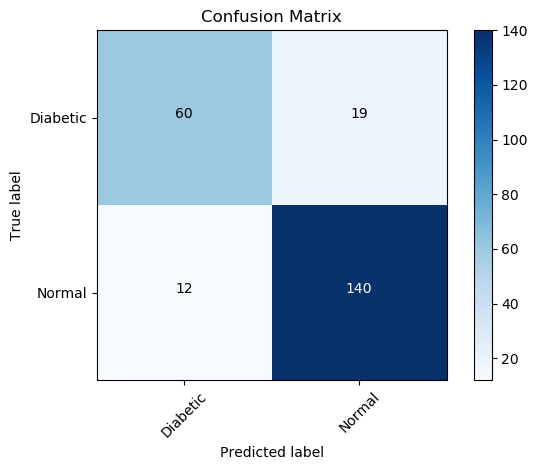

In [56]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Diabetic','Normal'],
                      title='Confusion Matrix')

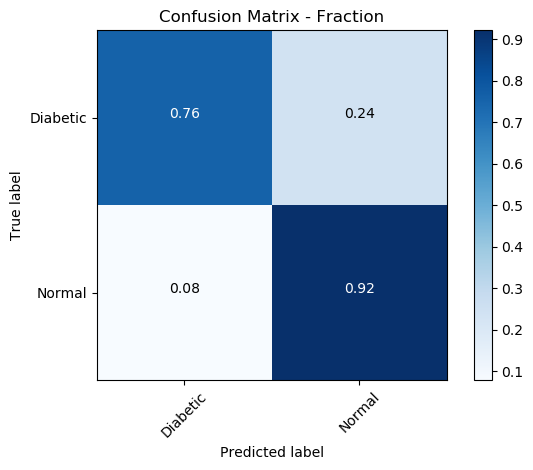

In [57]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Diabetic','Normal'],
                      title='Confusion Matrix - Fraction', normalize=True)

In [58]:
metrics = [binary_classifier_metrics(df['diabetes_class'], df['predicted_class'])]
df_metrics=pd.DataFrame.from_dict(metrics)
df_metrics.index = ['Model']

In [59]:
df_metrics

,TruePositive,TrueNegative,FalsePositive,FalseNegative,Positive,Negative,Recall,TrueNegativeRate,Precision,Accuracy,FalsePositiveRate,FalseNegativeRate,F1
Model,60,140,12,19,79,152,0.759494,0.921053,0.833333,0.865801,0.078947,0.240506,0.794702


In [60]:
print('Counts')
print(df_metrics[['TruePositive',
                  'FalseNegative',
                  'FalsePositive',
                  'TrueNegative',]].round(2))
print()
print('Fractions')
print(df_metrics[['Recall',
                  'FalseNegativeRate',
                  'FalsePositiveRate',
                  'TrueNegativeRate',]].round(2))
print()

print(df_metrics[['Precision',
                  'Accuracy',
                  'F1']].round(2))

Counts
       TruePositive  FalseNegative  FalsePositive  TrueNegative
Model            60             19             12           140

Fractions
       Recall  FalseNegativeRate  FalsePositiveRate  TrueNegativeRate
Model    0.76               0.24               0.08              0.92

       Precision  Accuracy    F1
Model       0.83      0.87  0.79


In [61]:
print(classification_report(
    df['diabetes_class'],
    df['predicted_class'],
    labels=[1,0],
    target_names=['Diabetic','Normal']))

              precision    recall  f1-score   support

    Diabetic       0.83      0.76      0.79        79
      Normal       0.88      0.92      0.90       152

    accuracy                           0.87       231
   macro avg       0.86      0.84      0.85       231
weighted avg       0.86      0.87      0.86       231

